# AdaBoost

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

In [2]:
pd.set_option('display.max_columns', 100)

### Functions 

In [3]:
from sklearn.model_selection import GridSearchCV
# Function:    gridSearcBestEstimator
# Input:       Classifier, parameters, cross validation
# Output:      Prints Best Estimator
# Returns:     Best Estimator
def gridSearcBestEstimator(model, params, cv):
    clf = model 
    gs = GridSearchCV(estimator=clf, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )

    gs.fit(X_train, y_train.values.ravel())
    best_estimator = gs.best_estimator_
    
    print('Best Estimator:')
    print(best_estimator,'\n')
    
    #if model == DecisionTreeClassifier():
    #    best_estimator.get_depth()

    return best_estimator

In [4]:
# Function:    fitModel
# Input:       Classifier
# Returns:     Fitted Model
def fitModel(model):
    clf = model
    clf.fit(X_train, y_train.values.ravel())
    
    return clf

In [5]:
from sklearn.metrics import accuracy_score
# Function:    modelAccuracy
# Input:       Classifier with Best Estimator
# Output:      Prints Training & Testing Accuracy
# Returns:     Y Test Predictions
def modelAccuracy(model):
    clf = model
    
    # Make Train predictions
    y_train_pred = clf.predict(X_train)
    # Calculate accuracy score
    training_accuracy = accuracy_score(y_train, y_train_pred)
    print('Training Accuracy: ',training_accuracy)
    # confusionMatrixMetrics(y_train, y_pred)

    # Make Test predictions
    y_test_pred = clf.predict(X_test)
    # Calculate accuracy scores
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    print('Testing Accuracy:  ',testing_accuracy)
    
    return y_test_pred

In [6]:
from sklearn.metrics import confusion_matrix
# Function:    confusionMatrix
# Input:       Training/Testing dataframe and predictions
# Output:      Prints Formatted Confusion Matrix
# Returns:     Confusion Matrix Array
# URL:         https://towardsdatascience.com/evaluating-machine-learning-classification-problems-in-python-5-1-metrics-that-matter-792c6faddf5
def confusionMatrix(true_test_train, pred):
    true = true_test_train
    
    cm = confusion_matrix(true, pred.round(), normalize=None)

    # Assigning columns names
    cm_df = pd.DataFrame(cm, 
                        columns = ['Predicted Negative', 'Predicted Positive'],
                        index = ['Actual Negative', 'Actual Positive'])
    
    # Printing Formatted Confusion Matrix
    print('\n',cm_df)
    
    return cm

In [7]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# Function:    metrics
# Input:       confusion matrix array, true class values, predicted class values
# Output:      Prints Recall, Sensitivity, Precision, False Positive Rate, Balanced Accuracy & F1 Scores
def metrics(cm, true, pred):
    # Assign values from the confusion matrix to manually 
    # calculate Specificity and False Positive Rate 
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]

    # Recall
    recall = recall_score(true, pred)
    print('\nRecall:                  ', recall)
    # Sensitivity
    sensitivity = recall
    # Specificity
    specificity = (TN / float(TN + FP))
    print('Specificity:             ', specificity)
    # Precision
    precision = precision_score(true, pred)
    print('Precision:               ', precision)
    # False Positive Rate
    # fpr = (FP / float(TN + FP))
    # print ('False Positive Rate:     ', fpr)
    # Balanced Accuracy
    balanced_accuracy = (sensitivity + specificity)/2
    #balance_accuracy = metrics.balanced_accuracy_score(y_true, y_pred)
    print('Balanced Accuracy:       ', balanced_accuracy)
    # F1 Score Method 1: sklearn
    F1 = f1_score(true, pred)
    print('F1-Score:                ', F1)
    
    #return recall, specificity, precision, balanced_accuracy, F1, cm_df

In [8]:
# Function:    heatMap
# Input:       actual y values, predicted y values
# Output:      Heat Map Of Confusion Matrix
def heatMap(y_true, y_pred):
    cm_plot =  pd.crosstab(index=y_true.values.ravel(), columns=y_test_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(cm_plot, annot=True, square=False, fmt='', cbar=False)
    plt.title("Confusion Matrix", fontsize = 15)
    plt.show()

### Read The Data.

In [9]:
# Read HR_Employee.csv
X = pd.read_csv('./Data/HR_Employee.csv')
# Read Attrition.csv
y = pd.read_csv('./Data/Attrition.csv')

### Train Test Split.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)

### Cross Validate.

In [11]:
# Cross Validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Default AdaBoost Classifier

Training Accuracy:  0.8950437317784257
Testing Accuracy:   0.8684807256235828

                  Predicted Negative  Predicted Positive
Actual Negative                 357                  14
Actual Positive                  44                  26


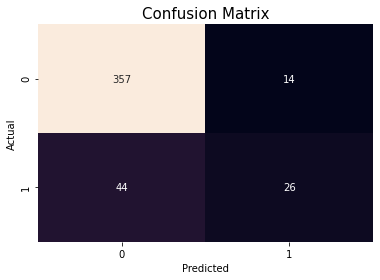


Recall:                   0.37142857142857144
Specificity:              0.9622641509433962
Precision:                0.65
Balanced Accuracy:        0.6668463611859838
F1-Score:                 0.4727272727272728


In [12]:
# Fit Model to Default Classifier
ab_clf = fitModel(AdaBoostClassifier())

# Calcualate Training and Testing Accuracy
y_test_pred = modelAccuracy(ab_clf)

# Print Confusion Matrix
cm = confusionMatrix(y_test, y_test_pred)

# Heat Map
heatMap(y_test, y_test_pred)

# Print Metrics
metrics(cm, y_test, y_test_pred)

# GridSearchCV AdaBoost Best Estimator

Best Estimator:
AdaBoostClassifier(n_estimators=100) 

Training Accuracy:  0.9047619047619048
Testing Accuracy:   0.8707482993197279

                  Predicted Negative  Predicted Positive
Actual Negative                 354                  17
Actual Positive                  40                  30


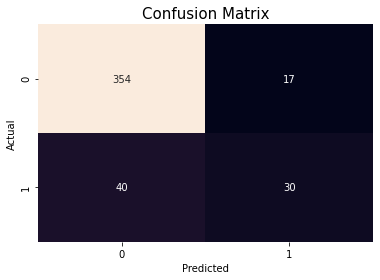


Recall:                   0.42857142857142855
Specificity:              0.954177897574124
Precision:                0.6382978723404256
Balanced Accuracy:        0.6913746630727763
F1-Score:                 0.5128205128205128


In [13]:
# Determine Best Estimator
params = dict(
    learning_rate = [0.0001, 0.001, 0.01, 0.1, 1.0],
    #n_estimators = [5, 10, 20, 30, 40, 50, 100, 200]
    n_estimators = [int(x) for x in np.linspace(start = 0, stop = 200, num = 3)]
)
best_estimator = gridSearcBestEstimator(AdaBoostClassifier(), params, cv)

# Fit Model to best_estimator
ab_clf = fitModel(best_estimator)

# Calcualate Training and Testing Accuracy
y_test_pred = modelAccuracy(ab_clf)

# Print Confusion Matrix
cm = confusionMatrix(y_test, y_test_pred)

# Heat Map
heatMap(y_test, y_test_pred)

# Print Metrics
metrics(cm, y_test, y_test_pred)

# Observations

### Saw improvements in the following Metrics after applying GridSearchCV:  Testing Accuracy, Recall, Balanced Accuracy and F1-Score.